# Explainable Boosting Machines (EBM)

In [1]:
# Importing the libraries

from interpret import show
from interpret.glassbox import ExplainableBoostingRegressor
from interpret.data import Marginal
from interpret.perf import RegressionPerf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load

In [2]:
# Hyperparameters

TEST_SIZE = 0.1
RANDOM_SEED = 24

In [3]:
# Model

ebm_model = load('ebm_model_trained.joblib')

In [4]:
df = pd.read_csv('material_data.csv')

FEATURES = ['nuclear_charge', 'covalent_radius (pm)', 'electronegativity', 'electron_affinity (eV)', 'nuclear_charge_max', 'nuclear_charge_min', 'covalent_radius_max (pm)', 'covalent_radius_min (pm)', 'electronegativity_max', 'electronegativity_min', 'electron_affinity_max (eV)', 'electron_affinity_min (eV)', 'ionization_energy (eV)', 'ionization_energy_max (eV)', 'ionization_energy_min (eV)', 'Cr$_+$ (pm)', 'Cr$_-$ (pm)', 'Cr$_*$ (pm)', 'Cr$_÷$ (pm)', 'E$_+$', 'E$_-$', 'E$_*$', 'E$_÷$', 'EA$_+$ (eV)', 'EA$_-$ (eV)', 'EA$_*$ (eV)', 'EA$_÷$ (eV)', 'I$_+$ (eV)', 'I$_-$ (eV)', 'I$_*$ (eV)', 'I$_÷$ (eV)']
TARGET = ['ef (eV)']

df = df.reindex(FEATURES + TARGET, axis=1)
df = df.dropna() 

X = df.reindex(FEATURES, axis=1)
y = df.reindex(TARGET, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

In [5]:
performance = RegressionPerf(ebm_model).explain_perf(X_test, y_test, name="Performance")
show(performance)

<!-- http://127.0.0.1:7001/2304625216240/ -->

In [6]:
explanation = ebm_model.explain_global()
show(explanation)

<!-- http://127.0.0.1:7001/2304685210592/ -->

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


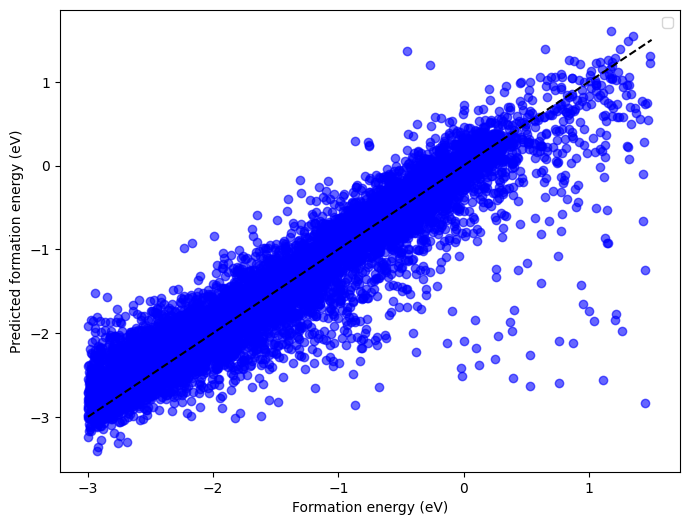

In [7]:
# Correlation scatter plot of formation energies

pred = ebm_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, alpha=0.6, color='b')
plt.plot([min(df['ef (eV)']), max(df['ef (eV)'])], [min(df['ef (eV)']), max(df['ef (eV)'])], 'k--')
plt.xlabel('Formation energy (eV)')
plt.ylabel('Predicted formation energy (eV)')
plt.legend()
plt.show()